In [72]:
from math import factorial

def linear_interpolation(xs, ys, x):
    
    x_i = min([d for d in xs if d > x])
    x_i_minus_1 = xs[np.where(xs == x_i)[0][0] - 1]
    y_i = ys[np.where(xs == x_i)[0][0]]
    y_i_minus_1 = ys[np.where(xs == x_i_minus_1)[0][0]]
    
    x_border = (min(xs) - min(xs) / 30, max(xs) + max(xs) / 30)
    y_border = (min(ys) - min(ys) / 30, max(ys) + max(ys) / 30)
    
    plot_x = np.array(np.arange(x_i_minus_1, x_i, step = 0.001))
    
    a_i = (y_i - y_i_minus_1) / (x_i - x_i_minus_1)
    b_i = y_i_minus_1 - a_i * x_i_minus_1
    
    y_x = a_i * x + b_i
    
    plt.figure(figsize=(20, 10))
    plt.plot(xs, ys, 'ro',
            plot_x, [a_i * x + b_i for x in plot_x], '--',
            x, y_x, 'yo')
    plt.vlines(x, y_border[0], y_x, linestyle="dashed")
    plt.hlines(y_x, x_border[0], x, linestyle="dashed")
    
    ax = plt.gca()
    ax.set_autoscale_on(False)
    ax.axis([x_border[0], x_border[1], y_border[0], y_border[1]])

    plt.grid()
    plt.show()
    
    return round(y_x, 4)

def square_interpolation(xs, ys, x):
    x_i = min([d for d in xs if d > x])
    x_i_minus_1 = xs[np.where(xs == x_i)[0][0] - 1]
    x_i_plus_1 = xs[np.where(xs == x_i)[0][0] + 1]
    
    y_i = ys[np.where(xs == x_i)[0][0]]
    y_i_minus_1 = ys[np.where(xs == x_i_minus_1)[0][0]]
    y_i_plus_1 = ys[np.where(xs == x_i_plus_1)[0][0]]
    
    plot_x = np.array(np.arange(x_i_minus_1, x_i_plus_1, step = 0.0001))
    x_border = (min(xs) - min(xs) / 30, max(xs) + max(xs) / 30)
    y_border = (min(ys) - min(ys) / 30, max(ys) + max(ys) / 30)
    
    c = np.linalg.solve(
        [
            [x_i_minus_1**2, x_i_minus_1, 1],
            [x_i**2, x_i, 1],
            [x_i_plus_1**2, x_i_plus_1, 1]
        ],
        [y_i_minus_1, y_i, y_i_plus_1]
    )
    
    y_x = c[0] * x**2 + c[1] * x + c[2]
    
    plt.figure(figsize=(20, 10))
    plt.plot(xs, ys, 'ro',
            plot_x, [c[0] * x**2 + c[1] * x + c[2] for x in plot_x], '--',
            x, y_x, 'yo')
    plt.vlines(x, y_border[0], y_x, linestyle="dashed")
    plt.hlines(y_x, x_border[0], x, linestyle="dashed")
    
    ax = plt.gca()
    ax.set_autoscale_on(False)
    ax.axis([x_border[0], x_border[1], y_border[0], y_border[1]])

    plt.grid()
    plt.show()
    
    return round(y_x, 4)

def lagrandge_interpolation(xs, ys, x):
    y_x = 0.0
    for i in range(len(xs)):
        p = 1.0
        for j in range(len(xs)):
            if i != j:
                p *= (x - xs[j]) / (xs[i] - xs[j])
        y_x += p * ys[i]
    return round(y_x, 4)
    
    
def diff_difference(xs, ys):
    if len(xs) == 2:
        return (ys[1] - ys[0]) / (xs[1] - xs[0])
    else:
        return (diff_difference(xs[1:], ys[1:]) - diff_difference(xs[:-1], ys[:-1])) / (xs[len(xs) - 1] - xs[0])
    
def difference(ys, k, i):
    res = 0.0
    if k == 1:
        return ys[i + 1] - ys[i]
    else:
        return difference(ys, k - 1, i + 1) - difference(ys, k - 1, i)
    
def newton_interpolation_forward(xs, ys, x):
    h = xs[1] - xs[0]
    x_i_index = np.where(xs == min([d for d in xs if d > x]))[0][0]
    res = 0.0
    res += ys[x_i_index] # x = y0
    t = (x - xs[x_i_index]) / h
    res += t * difference(ys, 1, x_i_index) # x = y0 + t * diff1(y0)
    for i in range(len(xs) - x_i_index - 2):
        t = t * (t - i + 1)
        res += (t / factorial(i + 2)) * difference(ys, i + 2, x_i_index)
    return round(res, 4)

def newton_interpolation_backward(xs, ys, x):
    h = xs[1] - xs[0]
    x_i_index = np.where(xs == min([d for d in xs if d > x]))[0][0]
    res = 0.0
    res += ys[len(ys) - 1] # x = y0
    t = (x - xs[len(xs) - 1]) / h # t = (x - x_n) / h
    res += t * difference(ys, 1, len(ys) - 2) # x = y0 + t * diff1(y0)
    for i in range(len(xs) - x_i_index - 2):
        t = t * (t + i - 1)
        res += (t / factorial(i + 2)) * difference(ys, i + 2, ys[len(ys) - i + 2])
    return round(res, 4)

def newton_interpolation_diff(xs, ys, x):
    x_i = min([d for d in xs if d > x])
    res = ys[np.where(xs == x_i)[0][0]]
    for i in range(np.where(xs == x_i)[0][0], len(xs) - 1):
        p = 1.0
        xss = xs[np.where(xs == x_i)[0][0]:i + 2]
        for j in xss[:-1]:
            p *= (x - j)
        p *= diff_difference(xss, ys[np.where(xs == x_i)[0][0]:i + 2])
        res += p
    return round(res, 4)

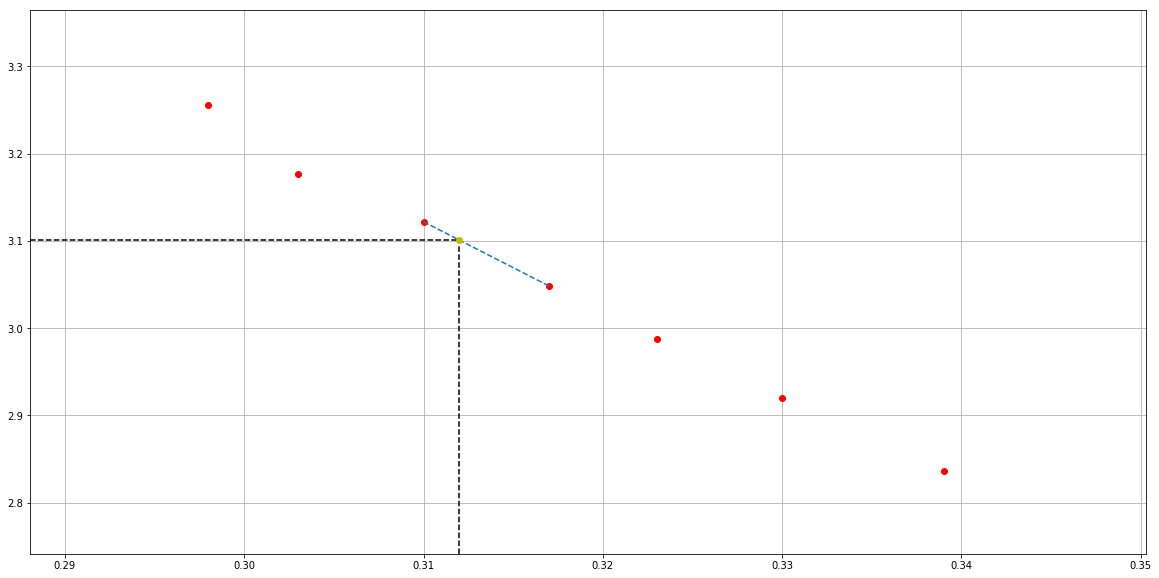

Линейная: 3.1008


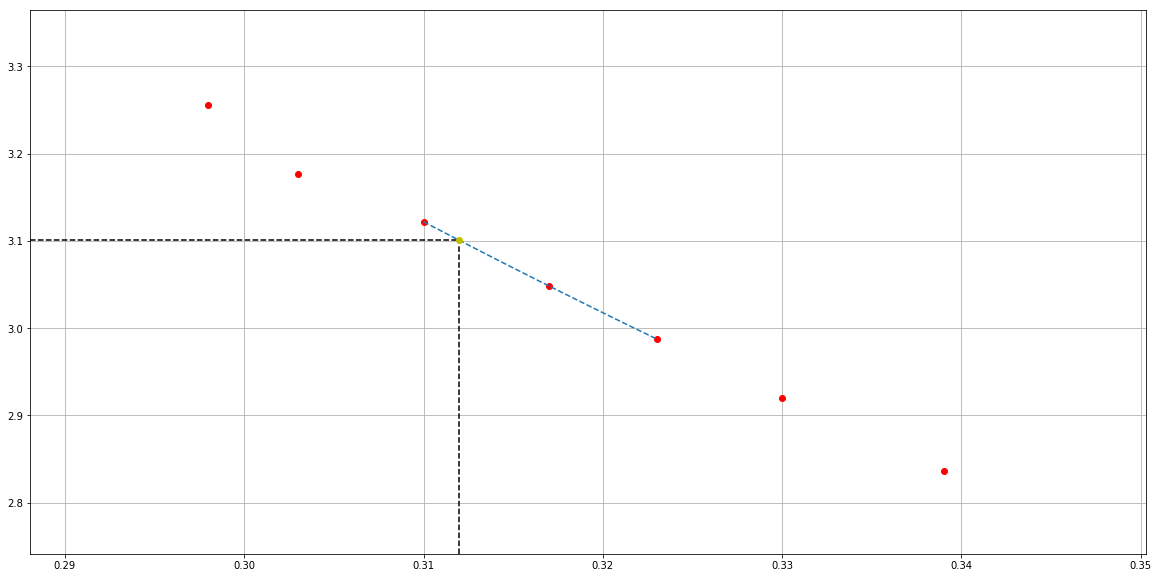

Квадратичная: 3.1005
Лаграндж: 3.1022
Ньютон для неравностоящих: 3.1007
Ньютон вперед: 3.1089


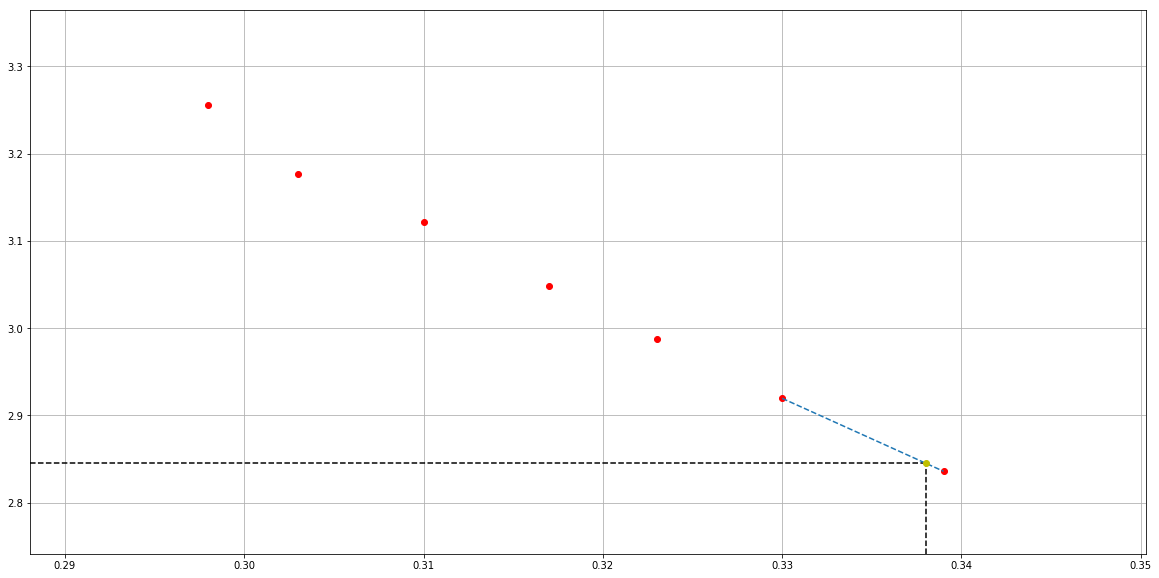

Линейная: 2.8452
Ньютон назад: 2.8526
Ньютон для неравностоящих: 2.8359
Лаграндж: 2.8385


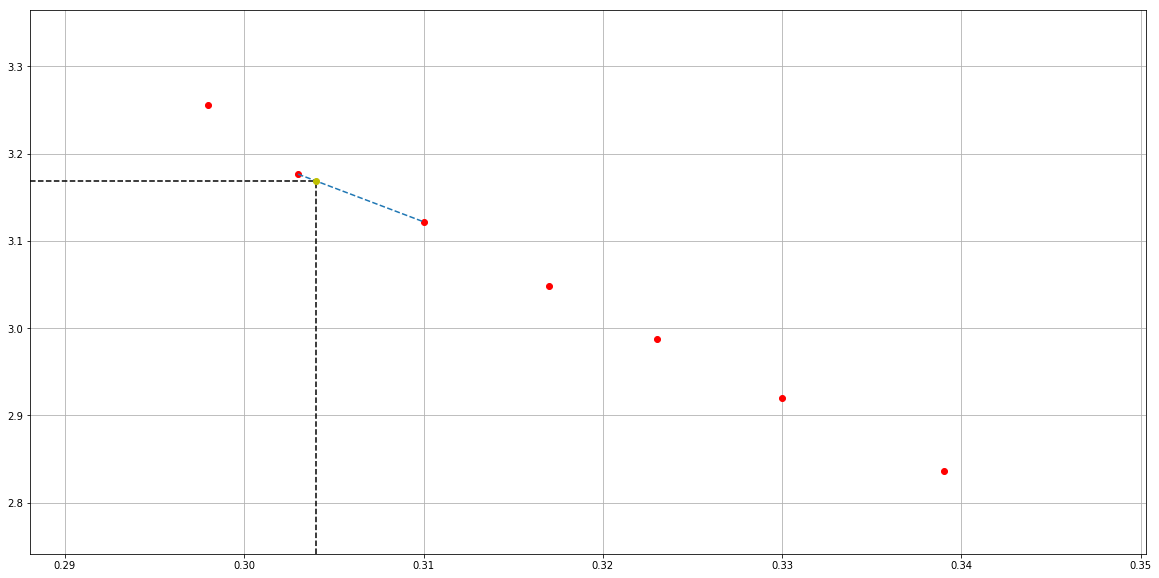

Линейная: 3.1686
Ньютон для неравностоящих: 3.187


In [73]:
import matplotlib.pyplot as plt
import numpy as np

xs1 = np.array([0.298, 0.303, 0.310, 0.317, 0.323, 0.330, 0.339])
ys1 = np.array([3.2557, 3.1764, 3.1218, 3.0482, 2.9875, 2.9195, 2.8359])

print(f"Линейная: {linear_interpolation(xs1, ys1, 0.312)}")
print(f"Квадратичная: {square_interpolation(xs1, ys1, 0.312)}")
print(f"Лаграндж: {lagrandge_interpolation(xs1, ys1, 0.312)}")
print(f"Ньютон для неравностоящих: {newton_interpolation_diff(xs1, ys1, 0.312)}")
print(f"Ньютон вперед: {newton_interpolation_forward(xs1, ys1, 0.312)}")
print(f"Линейная: {linear_interpolation(xs1, ys1, 0.338)}")
print(f"Ньютон назад: {newton_interpolation_backward(xs1, ys1, 0.338)}")
print(f"Ньютон для неравностоящих: {newton_interpolation_diff(xs1, ys1, 0.338)}")
print(f"Лаграндж: {lagrandge_interpolation(xs1, ys1, 0.338)}")
print(f"Линейная: {linear_interpolation(xs1, ys1, 0.304)}")
print(f"Ньютон для неравностоящих: {newton_interpolation_diff(xs1, ys1, 0.304)}")